# Vinhos - Clustering com K-Means
> Neste exemplo vamos agrupar os constituites de três tipos de vinhos.
</br>
Base de dados encontrada em: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

### Os atributos utilizados:

***Alcohol***: álcool</br>
***Malic acid***: ácido málico</br>
***Ash***: cinzas (teor de matéria inorgânica)</br>
***Alcalinity of ash***: alcalinidade das cinzas</br>
***Magnesium***: magnésio</br>
***Total phenols***: fenóis totais (composto orgânico ligado a composto aromático)</br>
***Flavanoids***: flavonóides (pigmentos naturais fundamentais contra agentes oxidantes)</br>
***Nonflavanoid phenols***: fénois não flavonóides</br>
***Proanthocyanins***: proantocianidinas (atividade antioxidante)</br>
***Color intensity***: intensidade da cor</br>
***Hue***: matiz (colorimetria)</br>
***OD280/OD315 of diluted wines***: fator OD280/OD315 de vinhos diluídos (método para determinar a concentração de proteina)</br>
***Proline***: prolina (aminoácido)</br>

### Pré-processamento

In [52]:
## ---- iniciando com as importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [53]:
## ---- importando o dataset 'wine-clustering.csv' 
urlWines = 'https://raw.githubusercontent.com/drisabelles/wine-clustering/main/dataset/wine-clustering.csv'
wines = pd.read_csv(urlWines, sep = ',')
wines.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Análise Exploratória
Se trata de estar gerando as entradas e saídas do dataframe para ter conhecimento sobre como os dados estão estruturados.

In [54]:
## ---- resumo sobre o tipo das variáveis
wines.info()

## ---- distribuições estatísticas sobre os dados 
wines.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Com essas informações observamos que não há *missing values* no conjunto de dados e com as informações estatísticas podemos ver alguns valores divergentes, como no valor máximo de Magnesium. A partir disso podemos gerar os *boxplots* desse conjunto de dados para a melhor visualização dos *outliers*.

<Axes: >

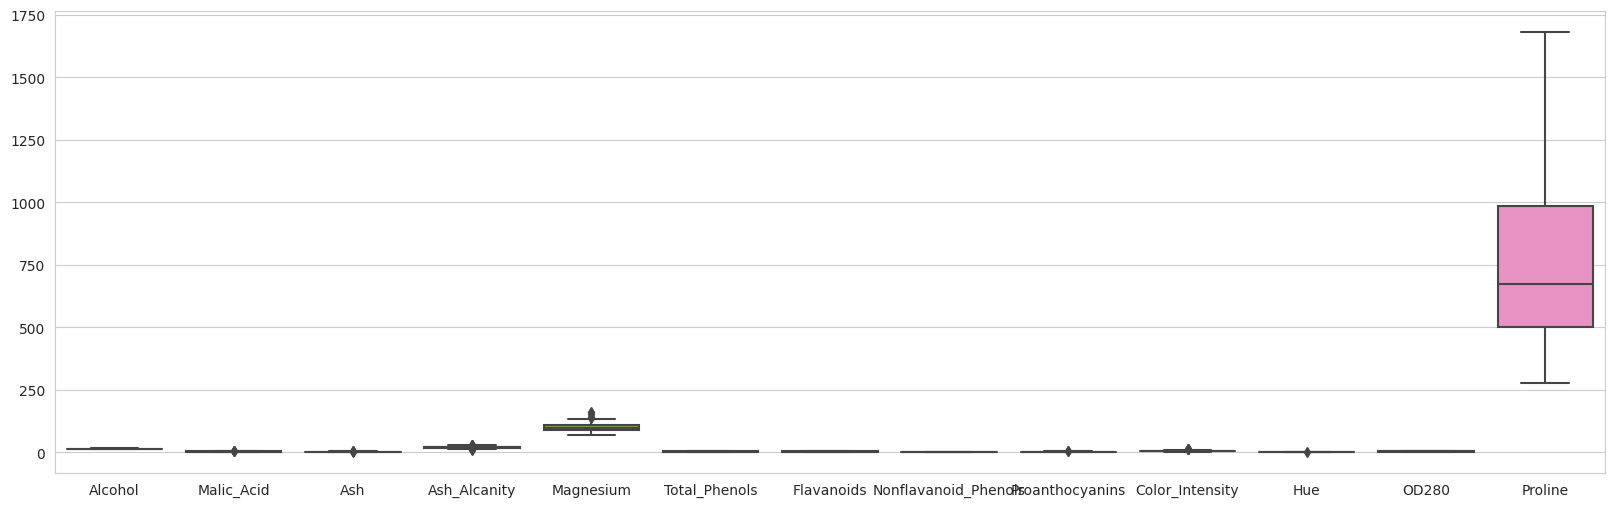

In [85]:
plt.figure(figsize = (20,6))
sns.boxplot(data = wines)

Devemos também fazer a consulta sobre se há dados duplicados

In [84]:
wines.duplicated().sum()

0

Não havendo a presença de dados duplicados, agora podemos fazer a plotagem dos gráficos para visualizarmos a distribuição das variáveis.

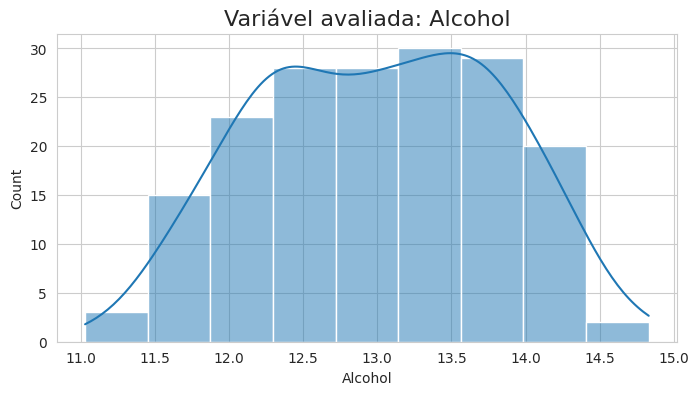

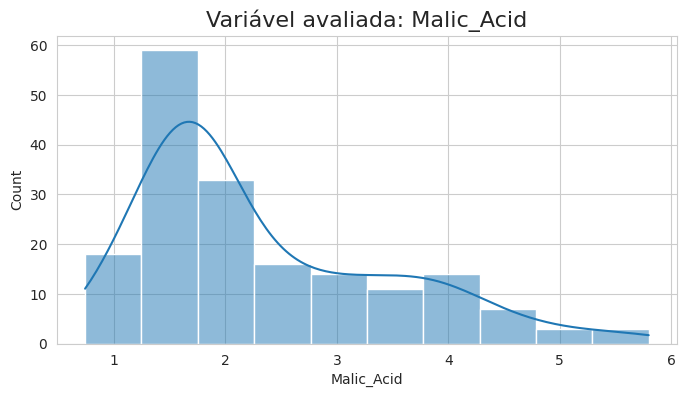

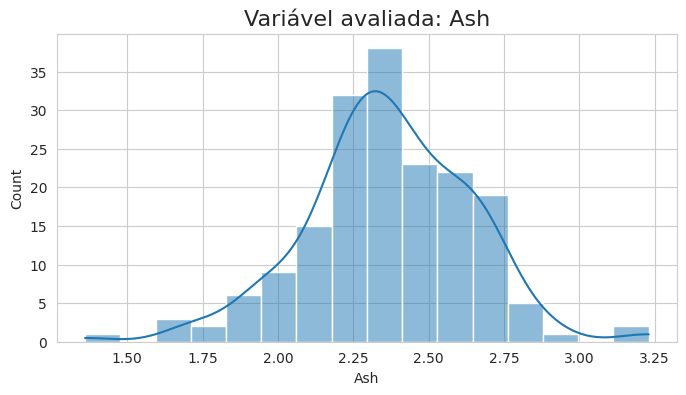

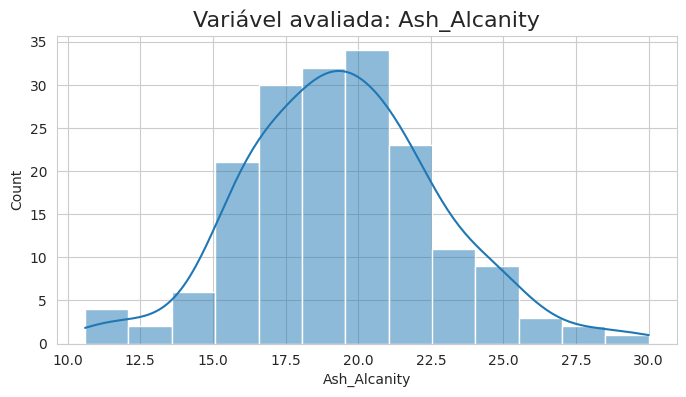

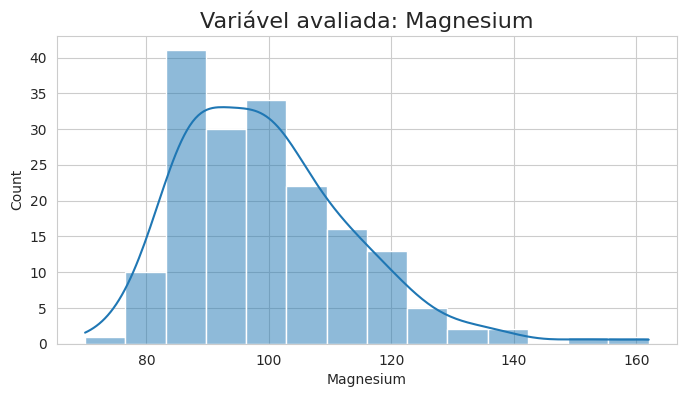

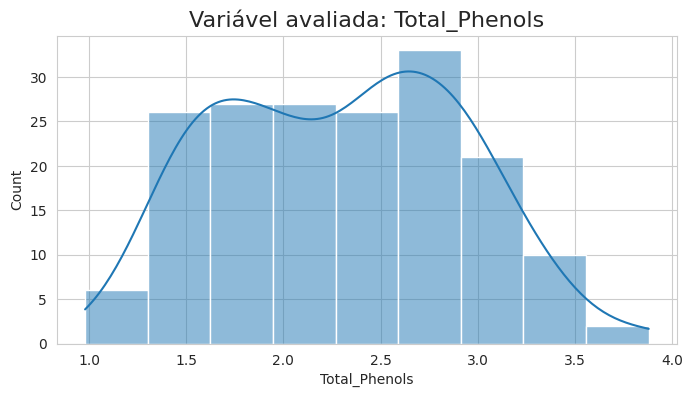

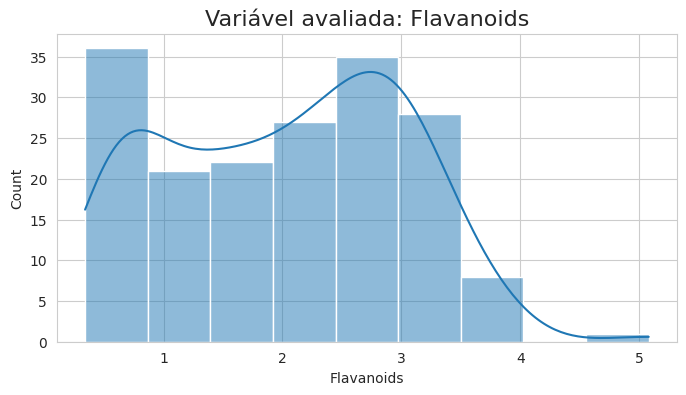

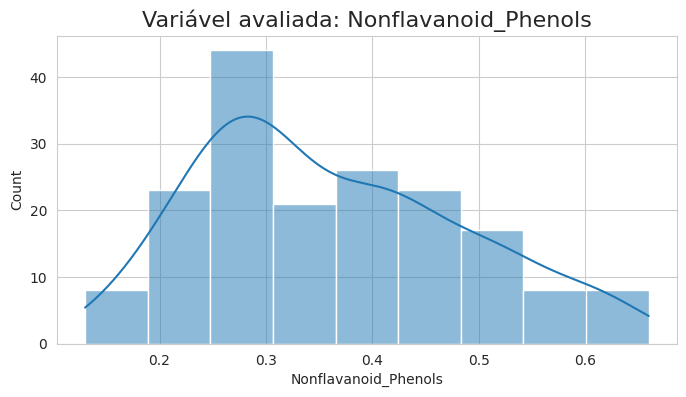

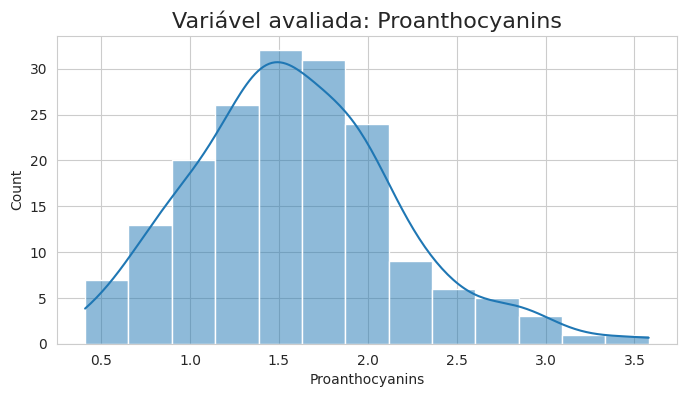

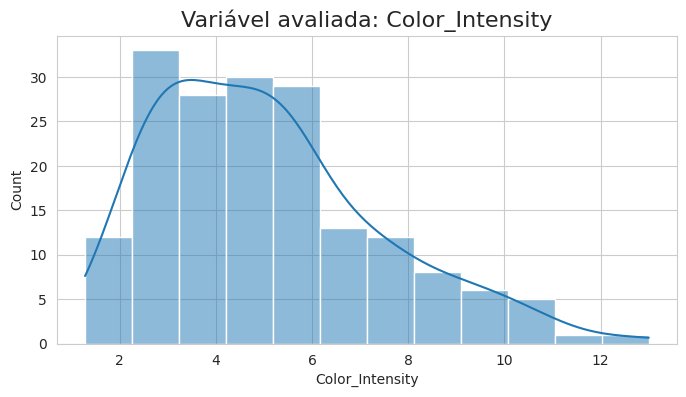

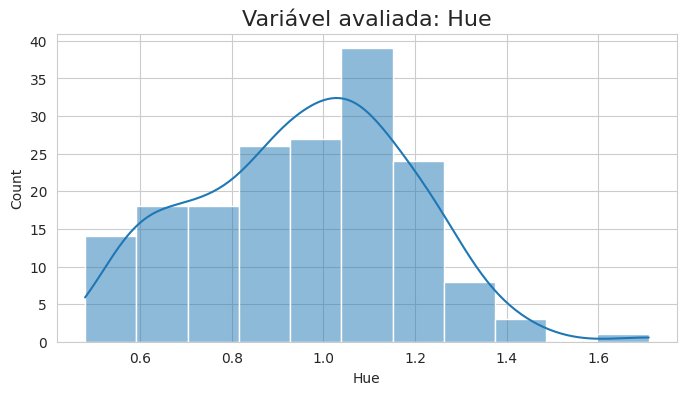

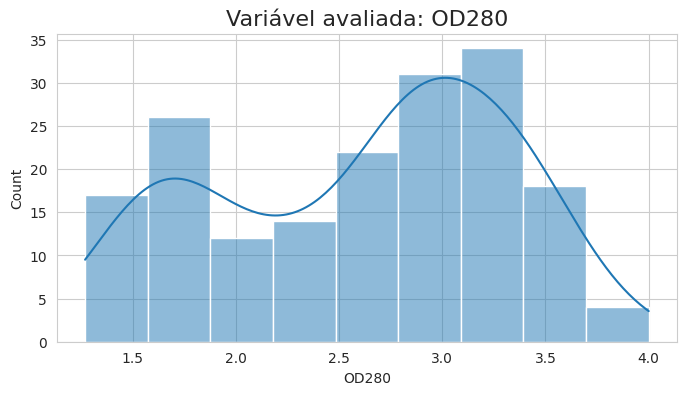

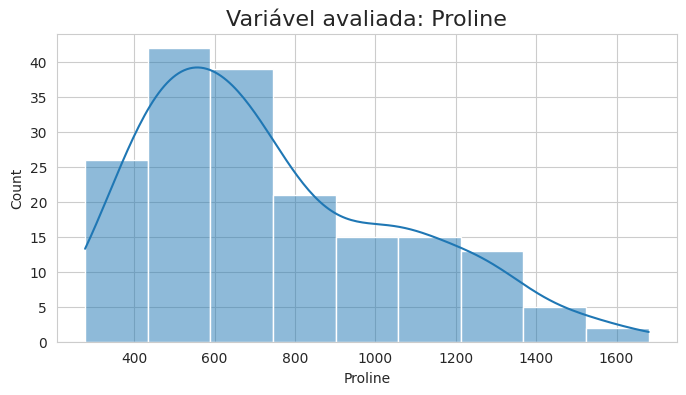

In [86]:
for c in wines.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Variável avaliada: {c}", fontsize = 16)
    sns.histplot(wines[c], kde = True)

Ao analisar os gráficos podemos constatar que muitas dessas distribuições fogem da normalidade. Por isso, para que o modelo tenha melhor desempenho, devemos realizar a padronização da escala das variáveis para que seus valores fiquem mais próximos a média e se aproximem a uma distribuição normal. 

Para essa finalidade estaremos utilizando o Standard Scaler.

In [58]:
## ---- importando as funções
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

## ---- instanciando a função 
new_wines = StandardScaler().fit_transform(wines)

new_wines = PowerTransformer(standardize=False).fit_transform(new_wines)

Com a padronização realizada, podemos observar o novo dataset e plotar novamente os gráficos para analisá-los.

In [87]:
new_wines = pd.DataFrame(new_wines, columns=wines.columns)
new_wines.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.015199,-0.291833,0.023389,-0.036331,-0.177769,-0.017102,0.007803,-0.128710,-0.087717,-0.198211,0.008995,0.116531,-0.220454
std,1.002558,0.898256,1.001332,1.000137,0.938580,1.002305,1.002873,0.982599,0.987446,0.943597,1.002849,0.990640,0.944720
min,-2.360019,-2.326026,-3.446954,-2.902866,-3.046715,-2.175264,-1.675193,-2.352143,-2.458394,-2.307181,-2.059750,-1.556798,-2.127490
25%,-0.777799,-0.850722,-0.562738,-0.710116,-0.991234,-0.900244,-0.821690,-0.827554,-0.637383,-0.966008,-0.761556,-0.846275,-0.969269
50%,0.061076,-0.502802,-0.023802,0.001518,-0.126279,0.095748,0.106267,-0.181536,-0.063404,-0.166574,0.033146,0.246406,-0.250968
75%,0.847963,0.525745,0.711992,0.586323,0.453060,0.796708,0.855270,0.555772,0.588594,0.436214,0.718463,0.875251,0.624318
max,2.327775,1.516365,3.351710,2.880294,2.526479,2.450308,3.119832,1.853907,2.763271,2.050612,3.377744,2.421421,1.775682


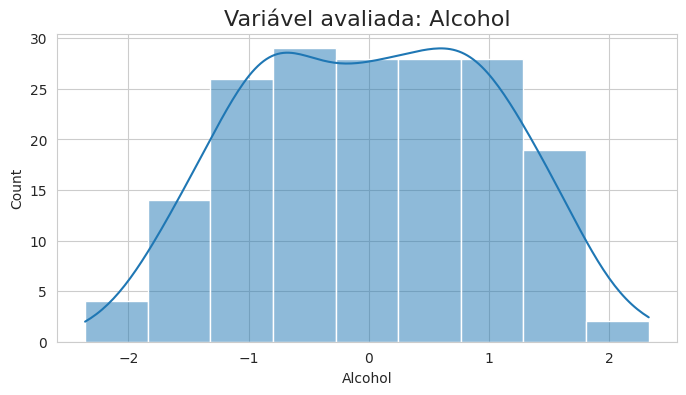

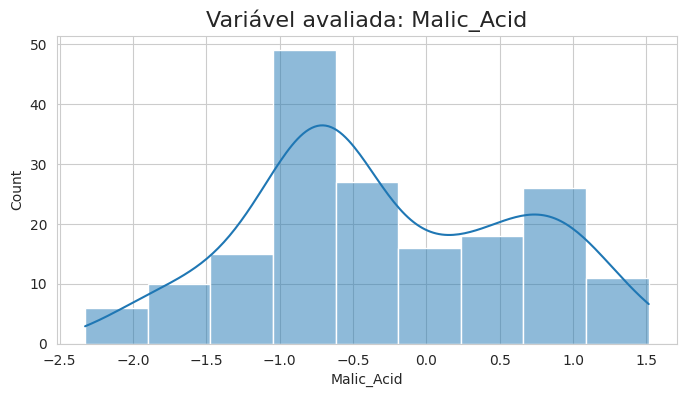

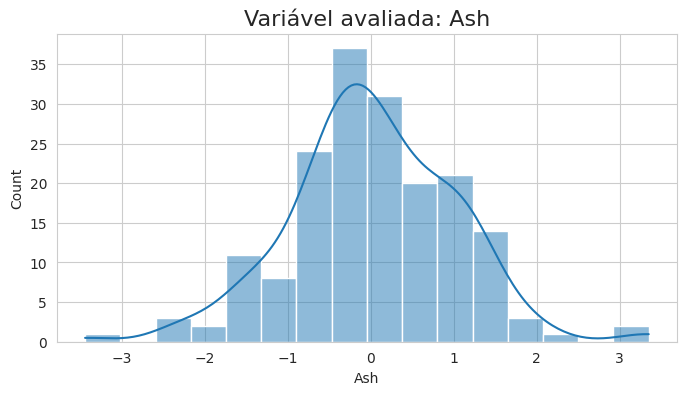

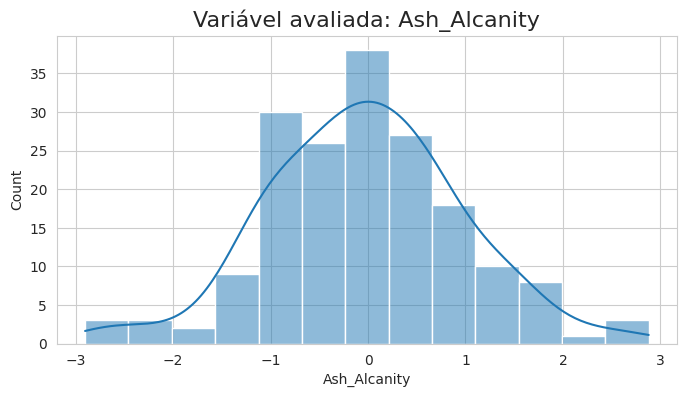

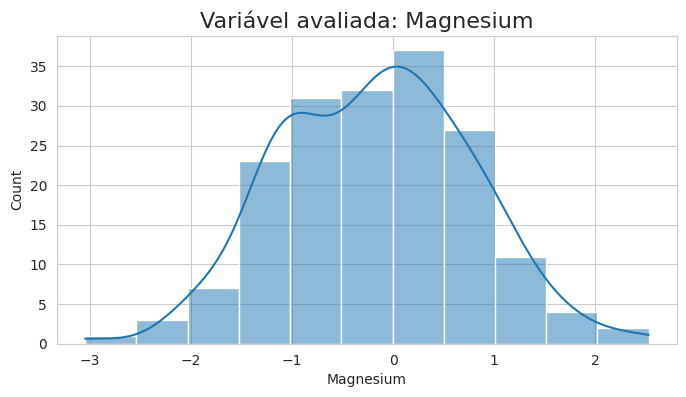

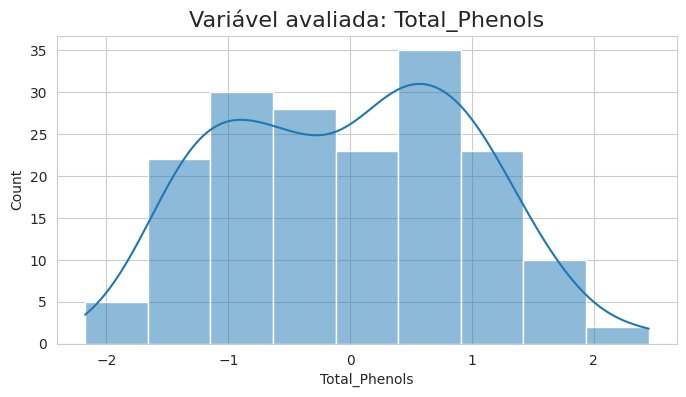

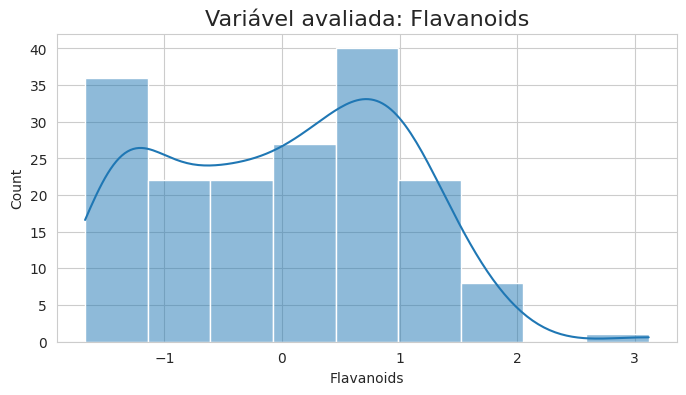

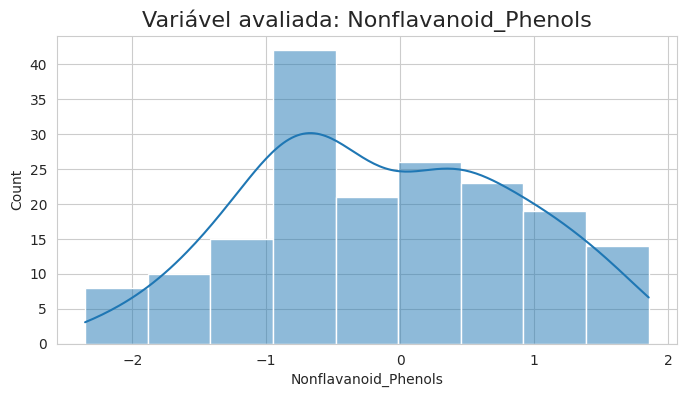

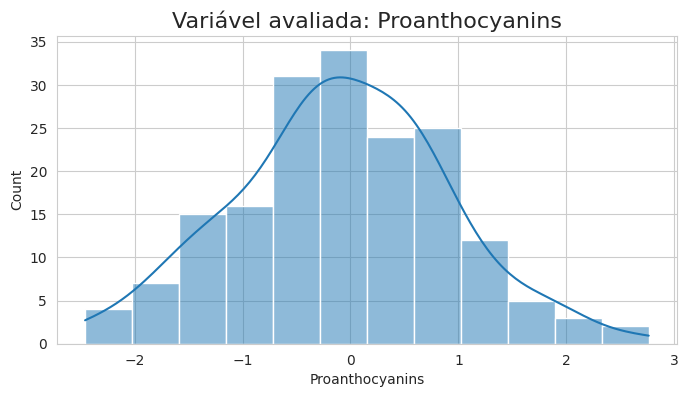

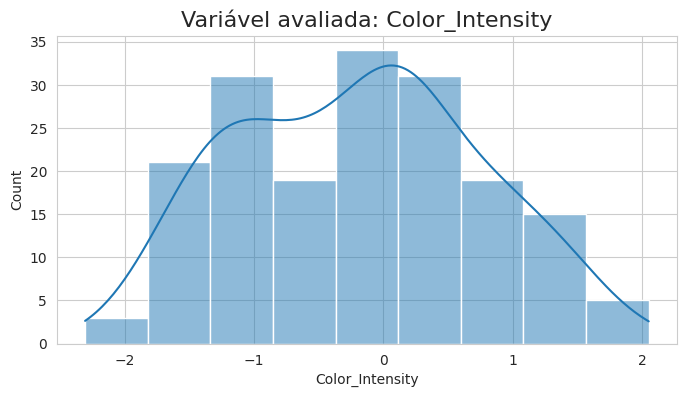

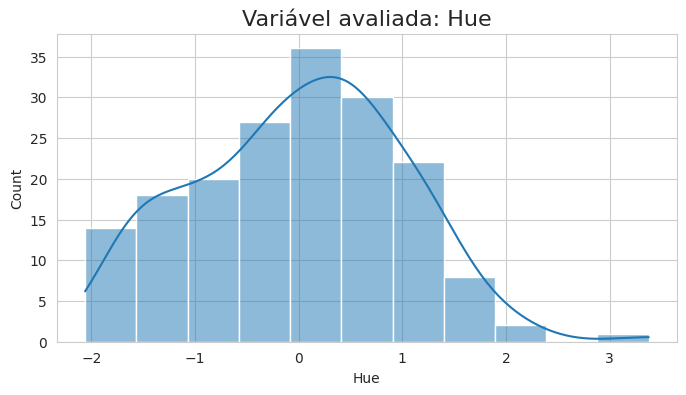

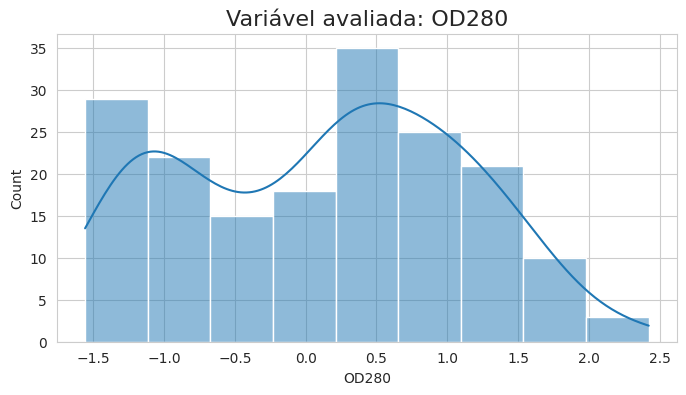

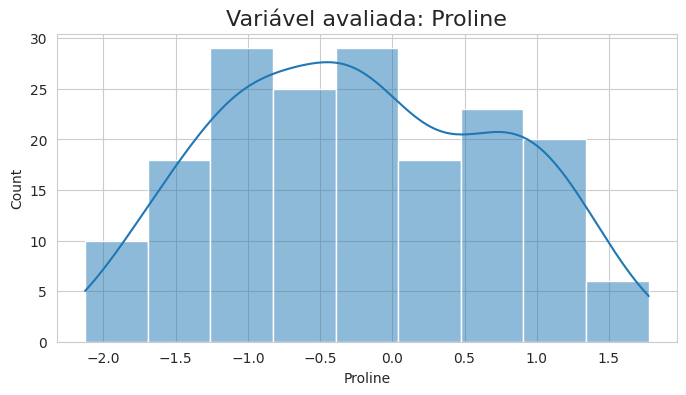

In [88]:
for c in wines.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Variável avaliada: {c}", fontsize = 16)
    sns.histplot(new_wines[c], kde = True)

### Iniciando o Clustering K-Means

O **K-Means** é um algoritmo de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza (ou agrupa) os dados de acordo com suas características.

Ele possui um número **K** de *clusters* que aleatoriamente são sorteados numa posição denominada centroide. Para cada observação da base, é calculado a distância entre essa observação e os **K centroides** dos *clusters*. Desta forma, cada observação terá **K distâncias** calculadas. Associamos a observação ao *cluster* cujo centroide está mais próximo dela. Após associar todas as observações aos *clusters*, é calculado a média das observações de cada *cluster* e o centroide movido para essa média.

Esse processo todo é repetido até que os centroides não tenham mais mudanças de posição. Quando chegamos neste ponto, dizemos que o algoritmo **K-Means** convergiu para a solução de descoberta dos *clusters*.

E também temos a *inertia* que é a soma das distâncias entre cada observação e centroide do *cluster* ao qual ela pertence, ao quadrado. Quanto mais *clusters* tiver, a inércia vai diminuindo, mas também atingindo uma estabilização.

In [61]:
## ---- importando o kmeans
from sklearn.cluster import KMeans

Vamos identificar o número ideal de clusters a serem usados

In [90]:
## ---- importando biblioteca de randomização
import random

fixed_random_state = random.seed(42)

## ---- iniciando a inertia
inertia_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(new_wines)
    inertia_1.append(kmeans_1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

O **método do cotovelo** é utilizado para visualizar o momento da inertia em que a distorção começa a diminuir de forma linear

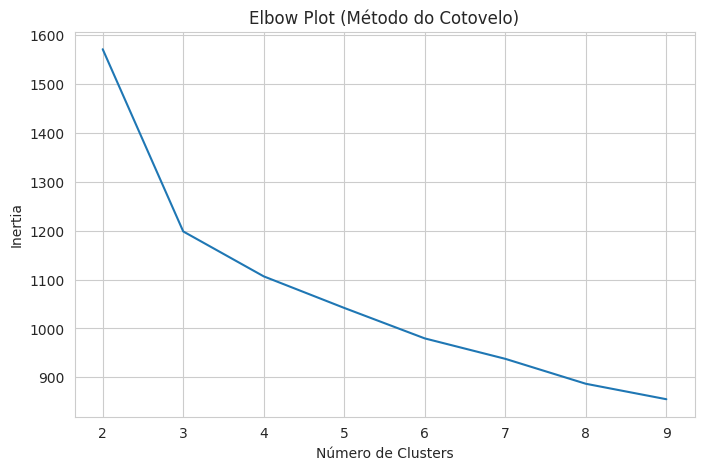

In [63]:
## ---- plotando o gráfico de cotovelo para visualizar o melhor número de clusters
fig, axs = plt.subplots(figsize=(8,5))
sns.lineplot(x=range_clusters_1, y=inertia_1)
plt.title('Elbow Plot (Método do Cotovelo)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

Observando o gráfico que foi plotado, podemos identificat na "curva do cotovelo" que o número de clusters ideal é 3. Com isso definido, podemos iniciar a clusterização.

### Clusterização


In [64]:
labels_1 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(new_wines)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Precisamos reduzir para 2 dimensões após o agrupamento para poder plotar os resultados.

In [65]:
## ---- instalando e importando umap
!pip install umap-learn
import umap.umap_ as umap

## ---- reduzindo o agrupamento para poder plotar os resultados
reducer_1 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_1  = reducer_1.fit_transform(new_wines)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


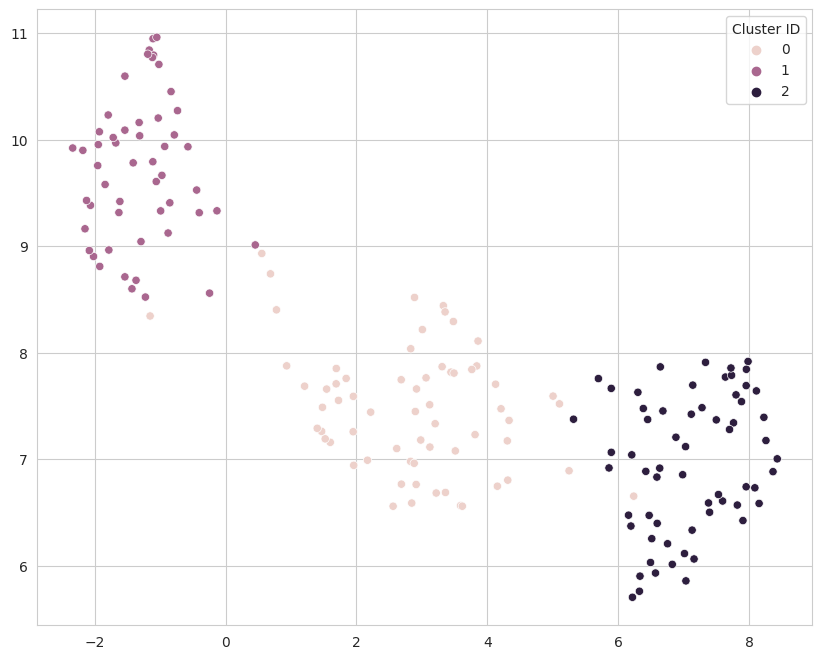

In [66]:
## ---- plotando os gráficos com os clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.legend(title="Cluster ID")
plt.show()

### K-Means com redução de dimensionalidade via PCA
O método **PCA** encontra uma aproximação (redução) dos dados originais. Essa aproximação é armazenada na variável Z. Com os dados da variável Z, o máximo que é possível fazer é aproximar o valor dos dados originais usando os componentes principais.

In [67]:
## ---- importando PCA
from sklearn.decomposition import PCA

Primeiros vamos identificar o número "ótimo" de componentes (principais) para manter.

In [68]:
pca = PCA(n_components=10, random_state=fixed_random_state).fit(new_wines)

princ_comps = np.arange(pca.n_components_, dtype=int) + 1

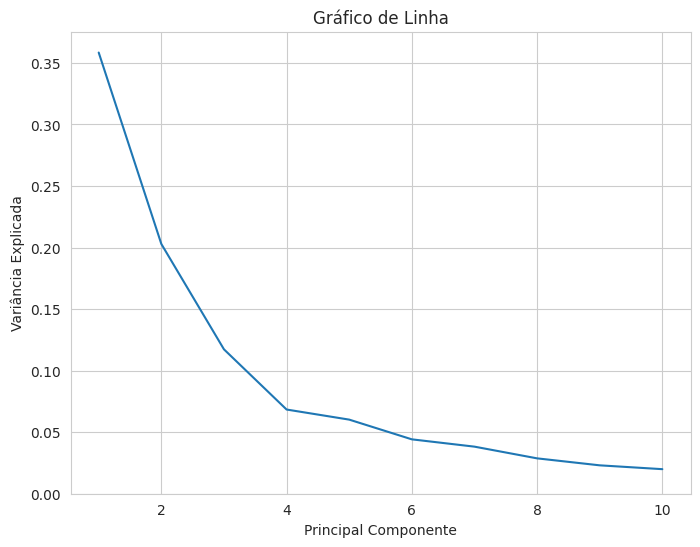

In [69]:
plt.figure(figsize=(8,6))
sns.lineplot(x=princ_comps, y=pca.explained_variance_ratio_)
plt.title('Gráfico de Linha')
plt.xlabel('Principal Componente')
plt.ylabel('Variância Explicada')
plt.ylim(bottom=0)
plt.show()

Nesse caso vemos que a ponta fica mais proeminente em 4 componentes principais.

Então será feito redução em 4 dimensões.

In [70]:
new_wines_2 = PCA(n_components=4, random_state=fixed_random_state).fit_transform(new_wines)

new_wines_2 = pd.DataFrame(new_wines_2, columns=["pc1", "pc2", "pc3", "pc4"])

new_wines_2.head()

,pc1,pc2,pc3,pc4
0,-3.361355,-1.335128,-0.241050,0.034622
1,-2.232559,0.183505,-2.117771,-0.314983
2,-2.361378,-1.061396,1.076760,0.495528
3,-3.661182,-2.383114,-0.072985,0.715901
4,-0.977118,-1.100360,2.028880,-0.459807


Agora veremos o número "ideal" de clusters a serem usados.

In [71]:
inertia_2 = []
range_clusters_2 = np.arange(2, 10, dtype=int)

for n in range_clusters_2:
    kmeans_2 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(new_wines_2)
    inertia_2.append(kmeans_2.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

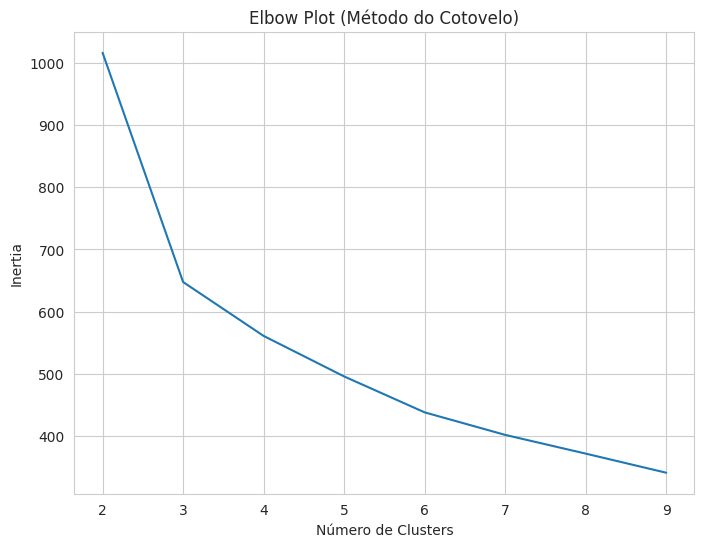

In [72]:
fig, axs = plt.subplots(figsize=(8,6))
sns.lineplot(x=range_clusters_2, y=inertia_2)
plt.title('Elbow Plot (Método do Cotovelo)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

Da mesma forma que o método sem redução de dimensionalidade, ele ficou mais proeminente em 3 clusters.

### Clusterização com redução de dimensionalidade

In [73]:
labels_2 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(new_wines_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


A redução para 2 dimensões é feita após o agrupamento para poder plotar os resultados

In [74]:
reducer_2 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_2 = reducer_2.fit_transform(new_wines_2)

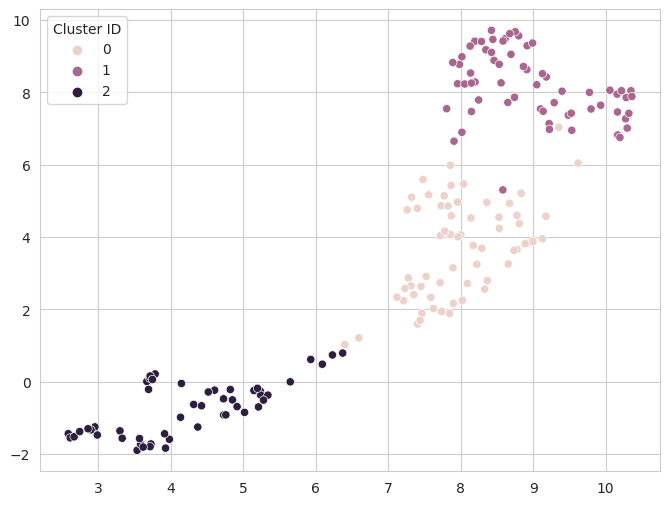

In [75]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.legend(title="Cluster ID")
plt.show()

### Comparação das diferentes abordagens
Feito re-plote dos clusters identificados por cada abordagem lado a lado para podermos comparar de forma mais conveniente.

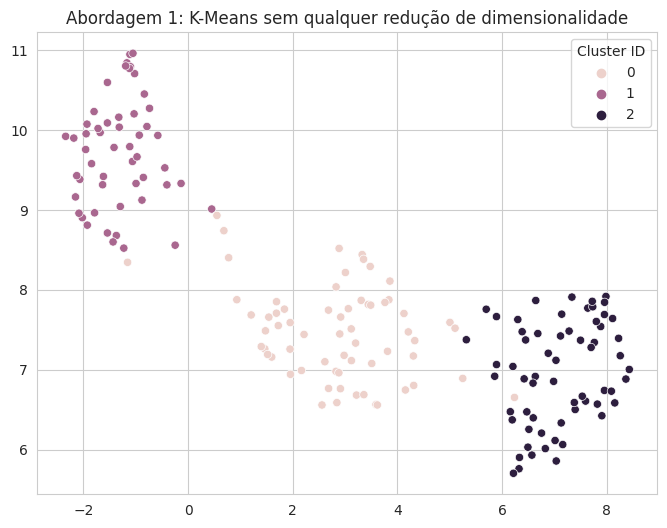

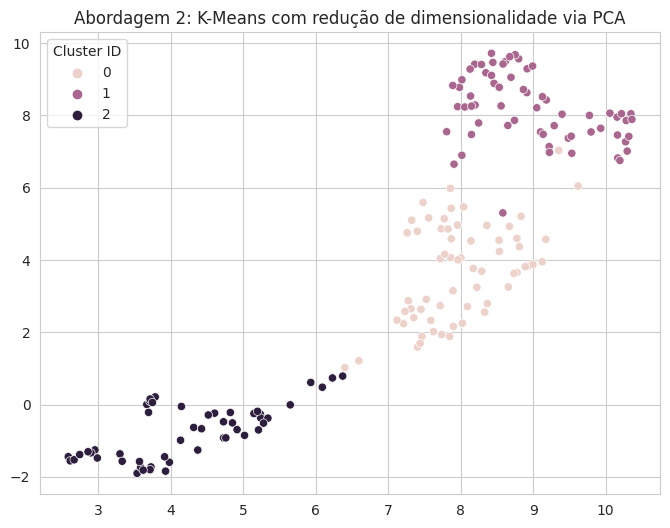

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.title("Abordagem 1: K-Means sem qualquer redução de dimensionalidade")
plt.legend(title="Cluster ID")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.title("Abordagem 2: K-Means com redução de dimensionalidade via PCA")
plt.legend(title="Cluster ID")
plt.show()

### Comparando os elbow plots
Podemos comparar os gráficos do método cotovelo para cada pesquisa de "número ideal de clusters".

Obs.: a métrica de inertia de K-Means não é normalizada.

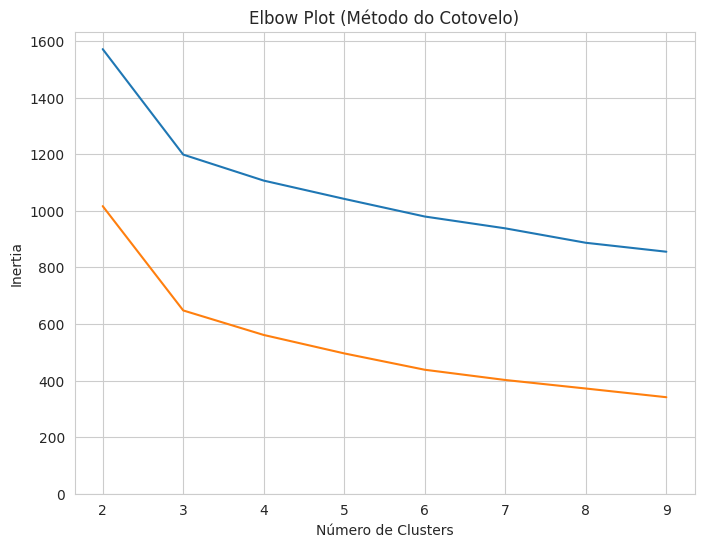

In [77]:
plt.figure(figsize=(8,6))
sns.lineplot(x=range_clusters_1, y=inertia_1)
sns.lineplot(x=range_clusters_2, y=inertia_2)
plt.title('Elbow Plot (Método do Cotovelo)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

Podemos ver que ambos levam a mesma conclusão

### Comparação das distribuições de recursos para cada cluster
Obs.: Lembre-se de que cada abordagem pode "ordenar" os IDs de cluster de maneira diferente, o que significa que o ID 0 para a abordagem 1 pode ser o mesmo que o ID 2 para a abordagem 2 e o ID 1 para a abordagem 3. Isso ocorre por conta da aleatoriedade a isso, ficando muito complicado reorganizar isso de forma manual.

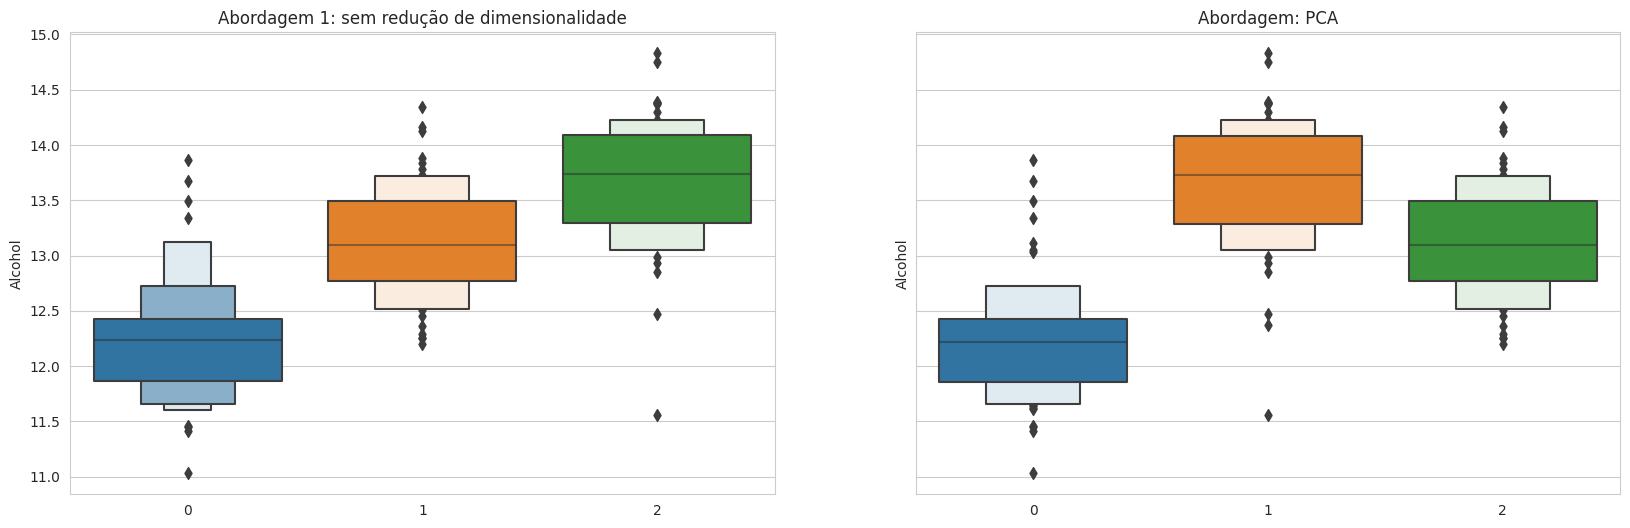

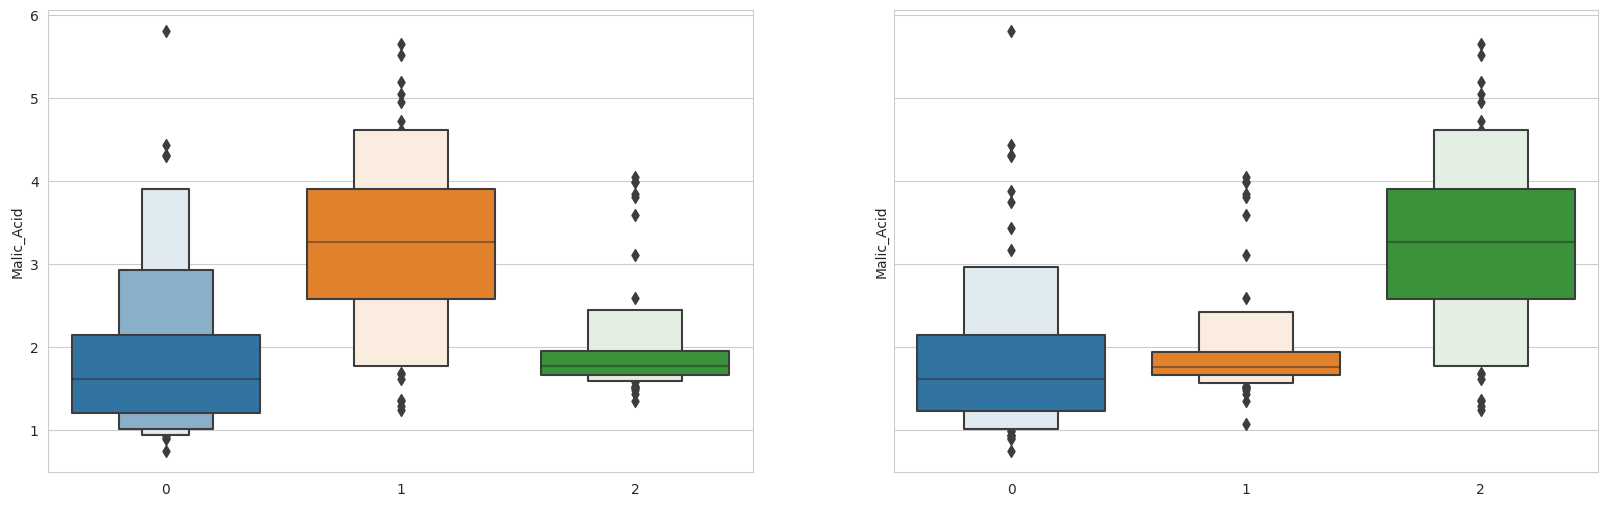

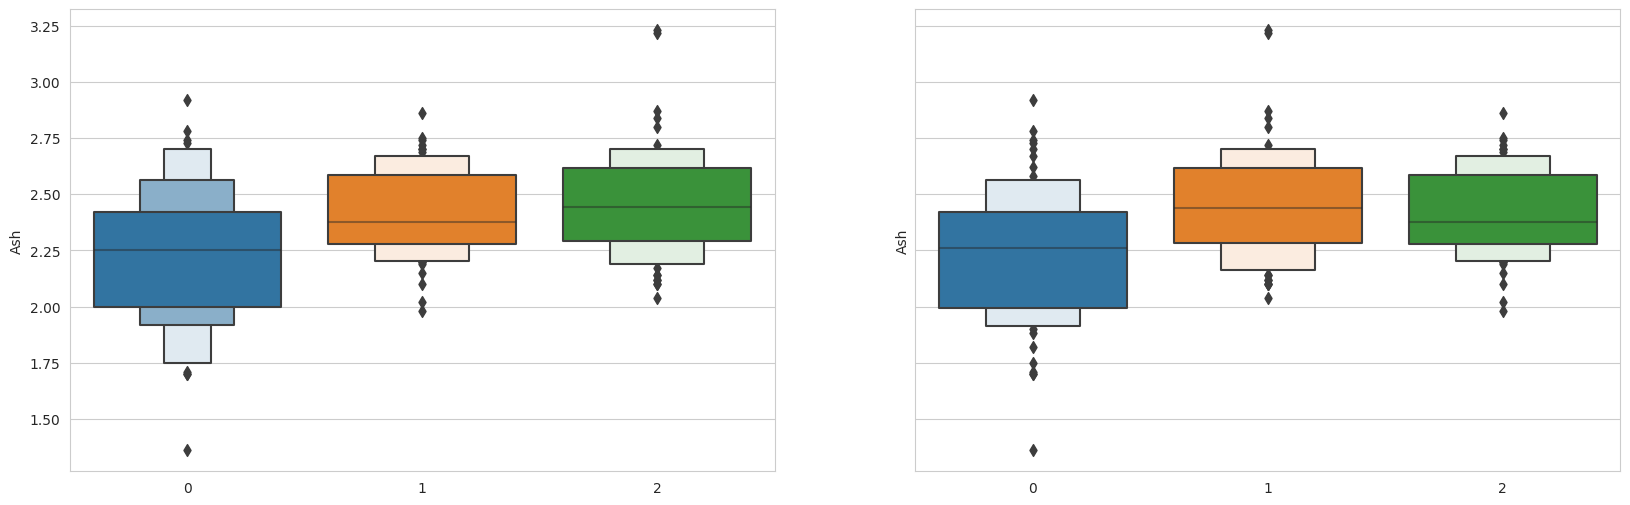

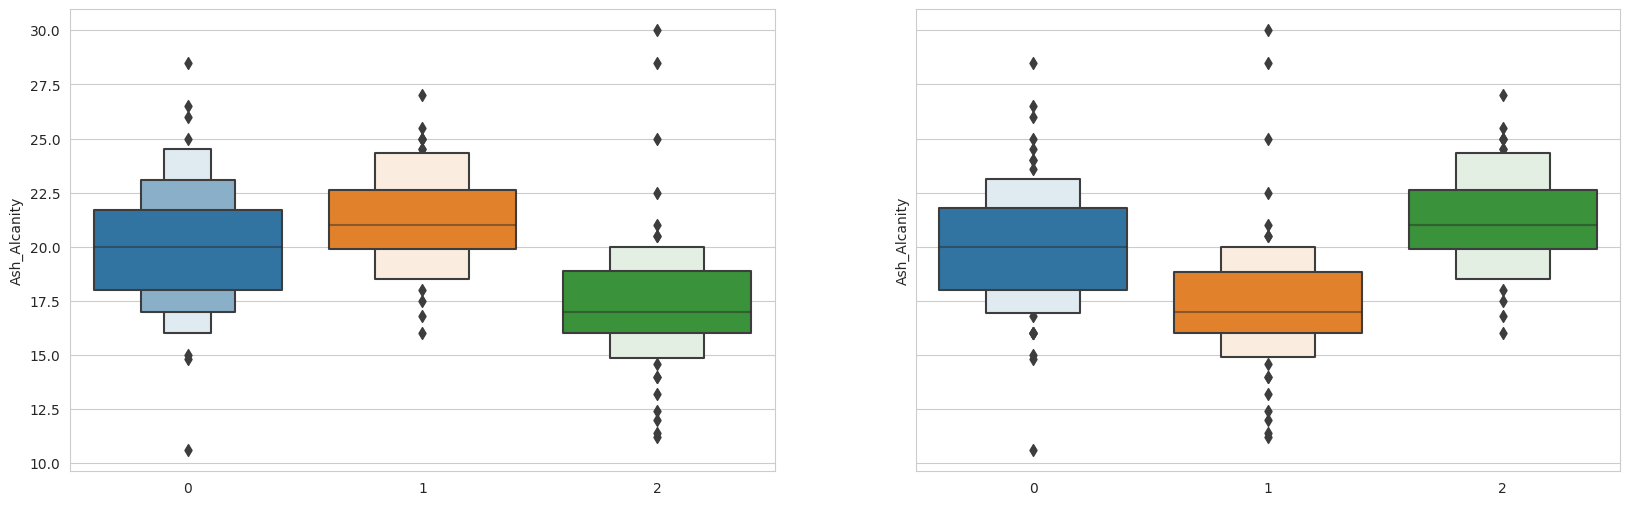

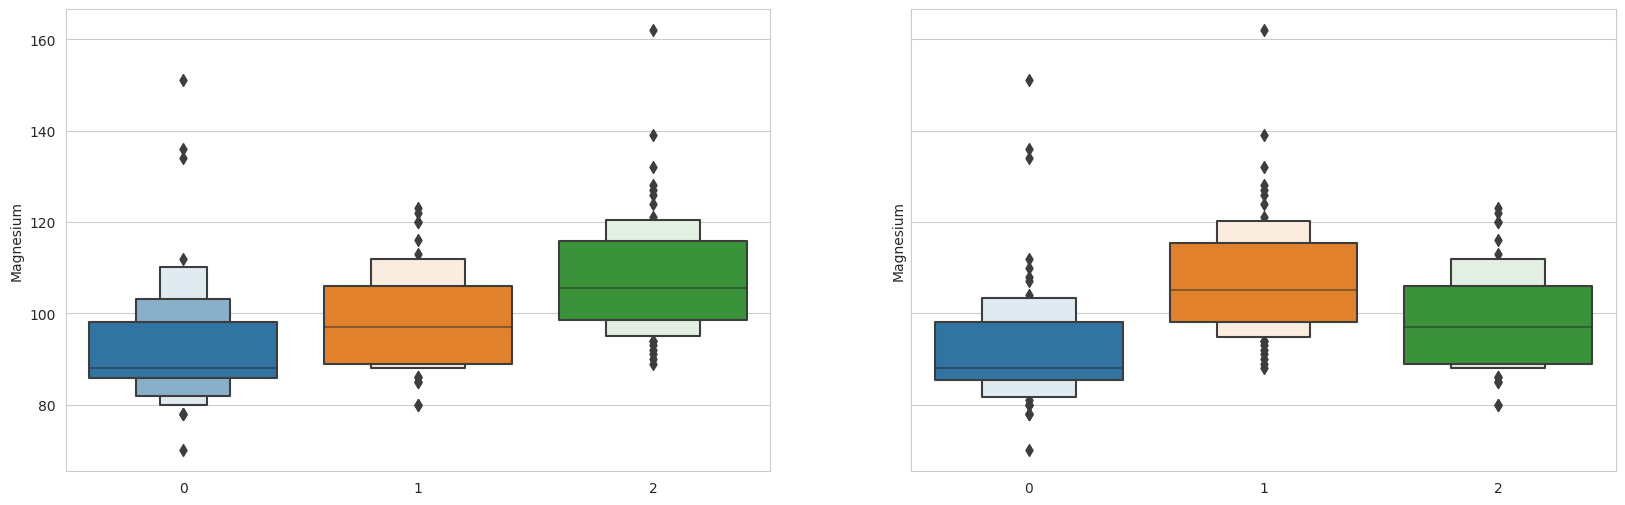

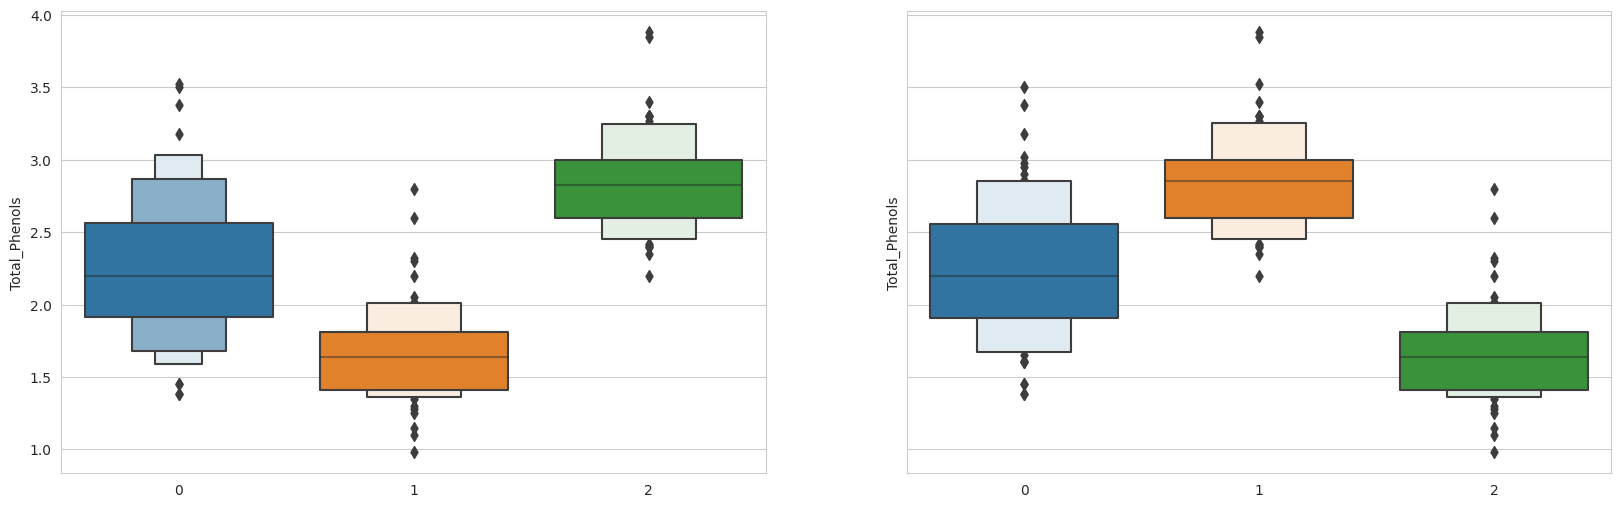

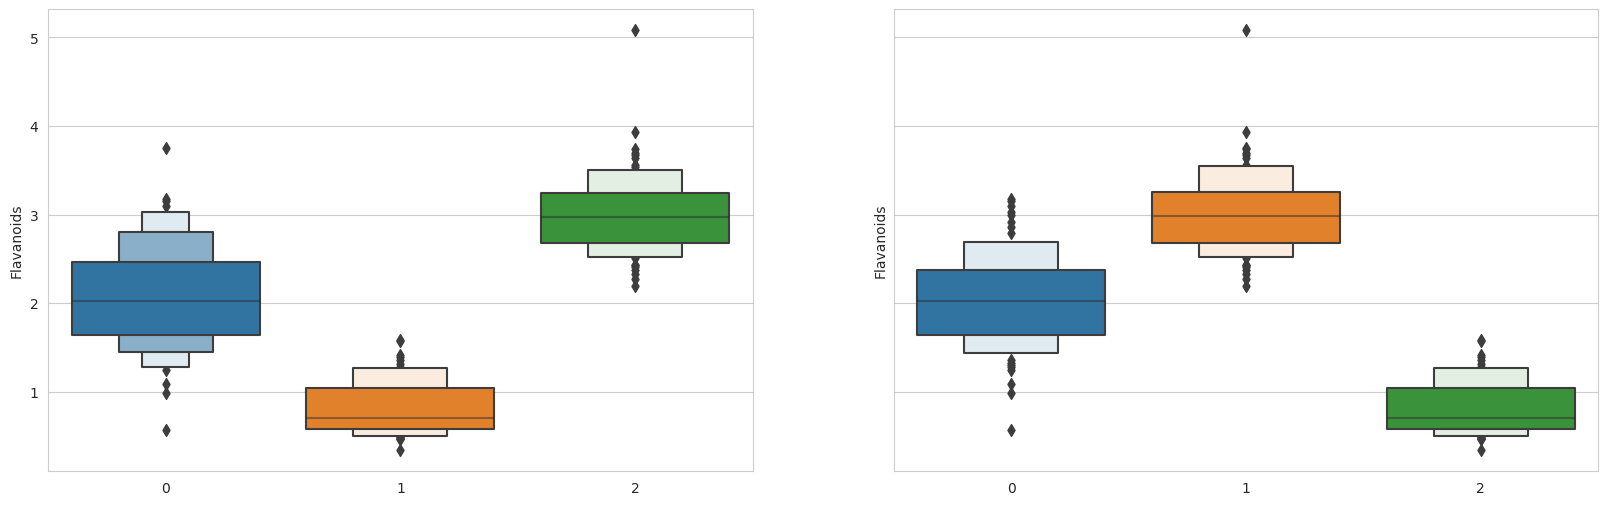

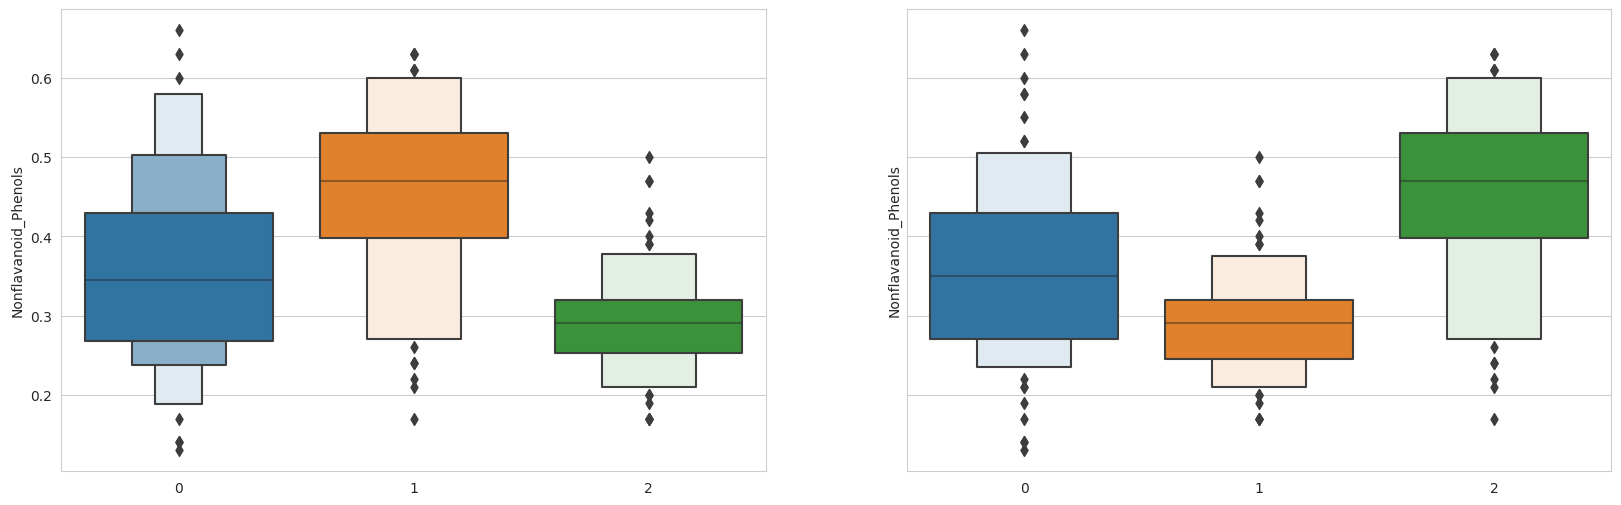

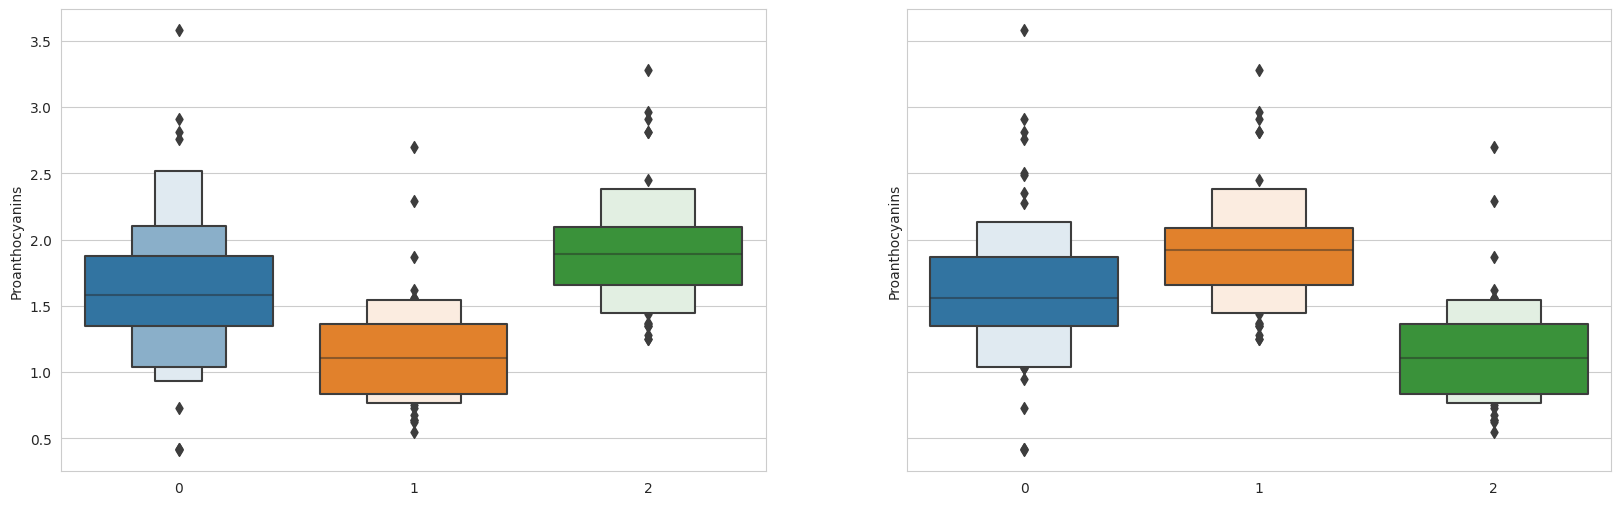

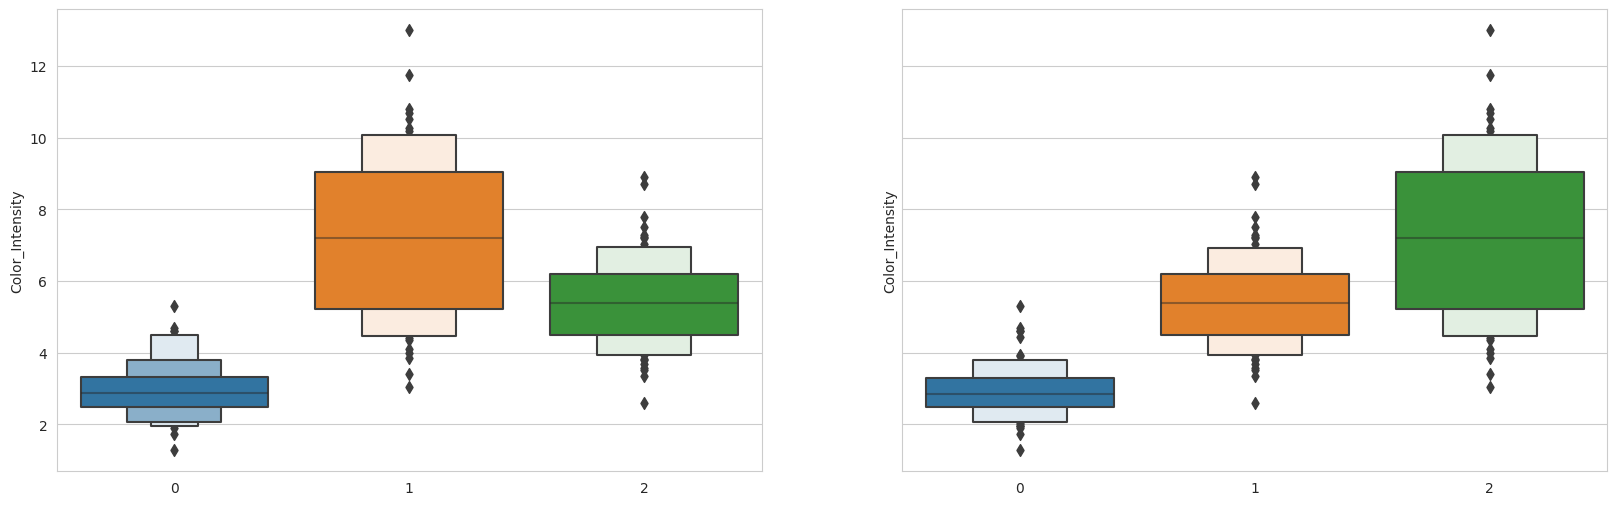

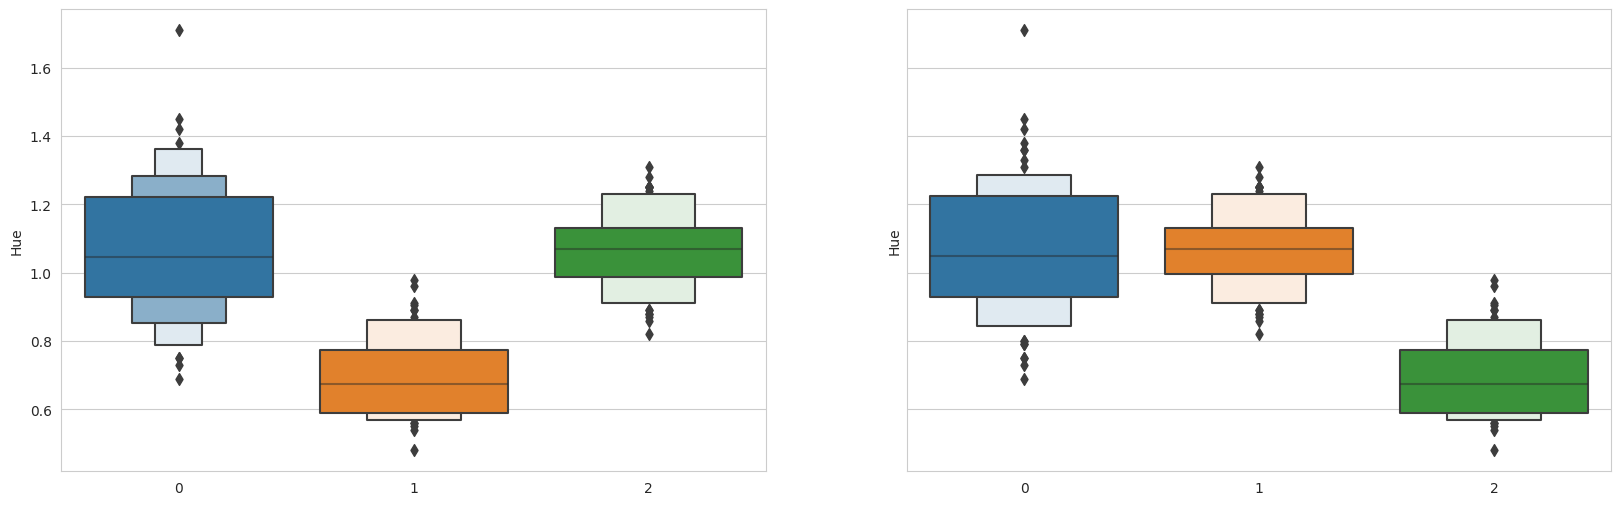

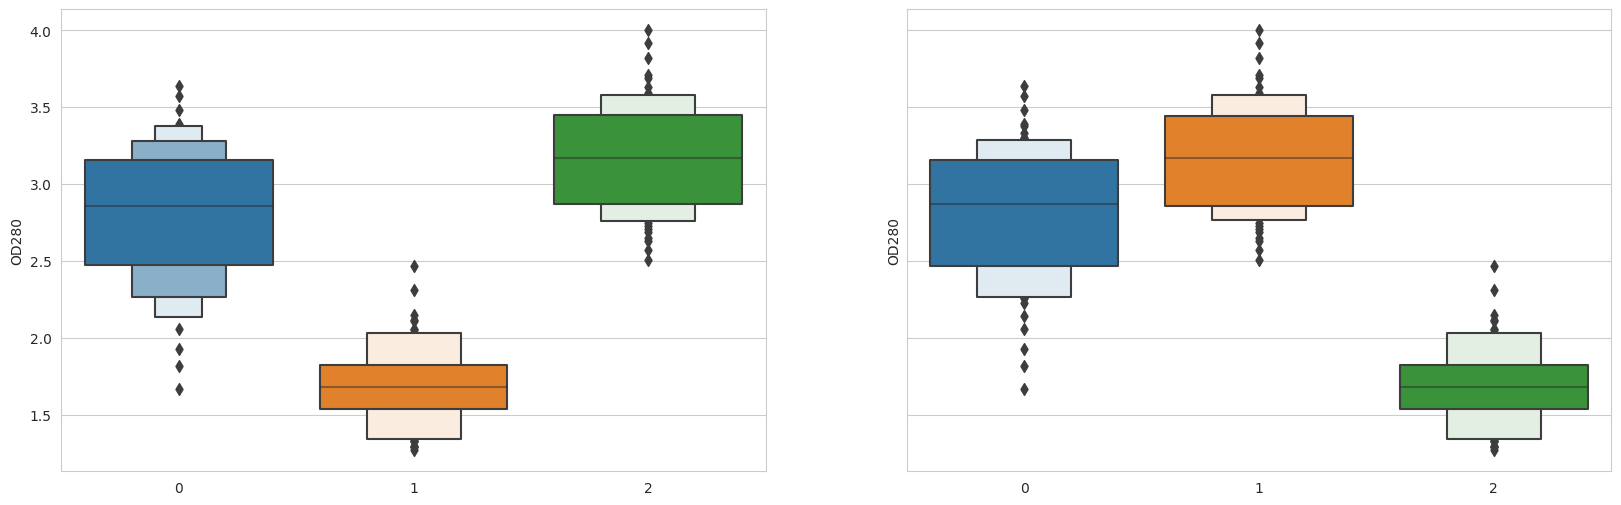

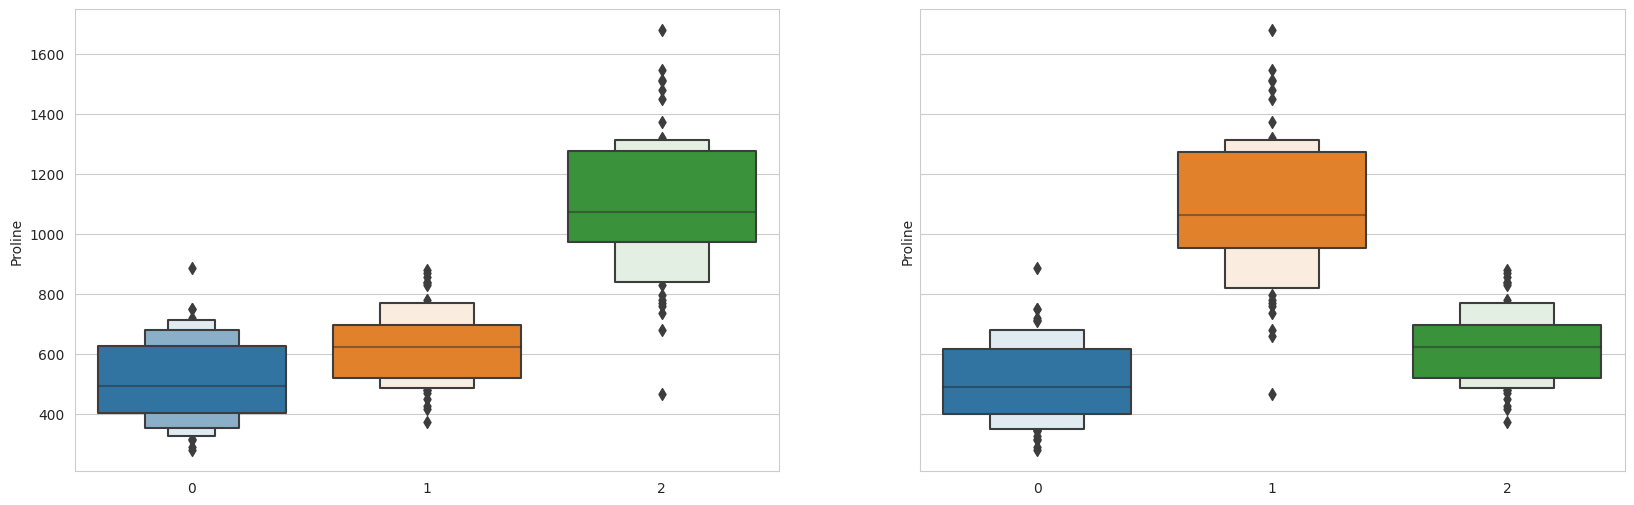

In [79]:
for i, col in enumerate(wines.columns):
    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,6))
    sns.boxenplot(x=labels_1, y=wines[col], ax=axs[0])
    sns.boxenplot(x=labels_2, y=wines[col], ax=axs[1])
    if i == 0:
        axs[0].set_title("Abordagem 1: sem redução de dimensionalidade")
        axs[1].set_title("Abordagem: PCA")
    plt.show()

Quantos pontos de dados existem em cada cluster para cada abordagem?

In [80]:
counts_1 = pd.Series(labels_1).value_counts().sort_index()
counts_2 = pd.Series(labels_2).value_counts().sort_index()

cluster_counts = pd.DataFrame({"app_1": counts_1, "app_2": counts_2})

cluster_counts.index.name = "cluster_id"

cluster_counts

,app_1,app_2
cluster_id,,
0,64,63
1,52,63
2,62,52


###Conclusão:
A duas abordagens com o algoritmo K-Mens obteve resultados satisfatórios, porém com pequenas sobreposições e diferenças. Não há uma superior ao se comparar.